<a href="https://colab.research.google.com/github/SayRizz/TensorFlow_Basics/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [3]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [4]:
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [5]:
len (X)

50

In [6]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

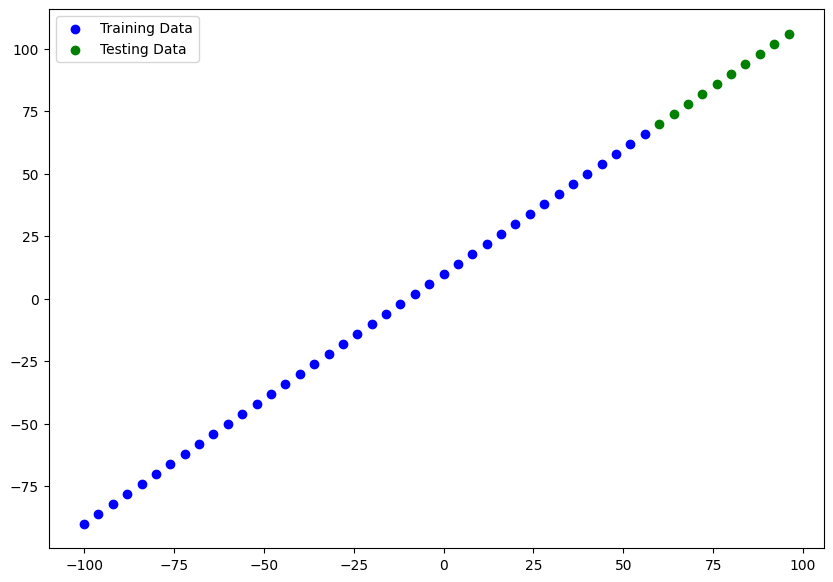

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend();

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit (X_train, y_train, epochs=100, verbose=0)

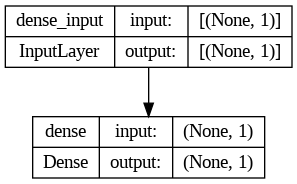

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [12]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 78ms/step


array([[ 74.58521 ],
       [ 79.47131 ],
       [ 84.357414],
       [ 89.24351 ],
       [ 94.12961 ],
       [ 99.0157  ],
       [103.9018  ],
       [108.7879  ],
       [113.673996],
       [118.5601  ]], dtype=float32)

In [13]:
def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = y_preds):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();


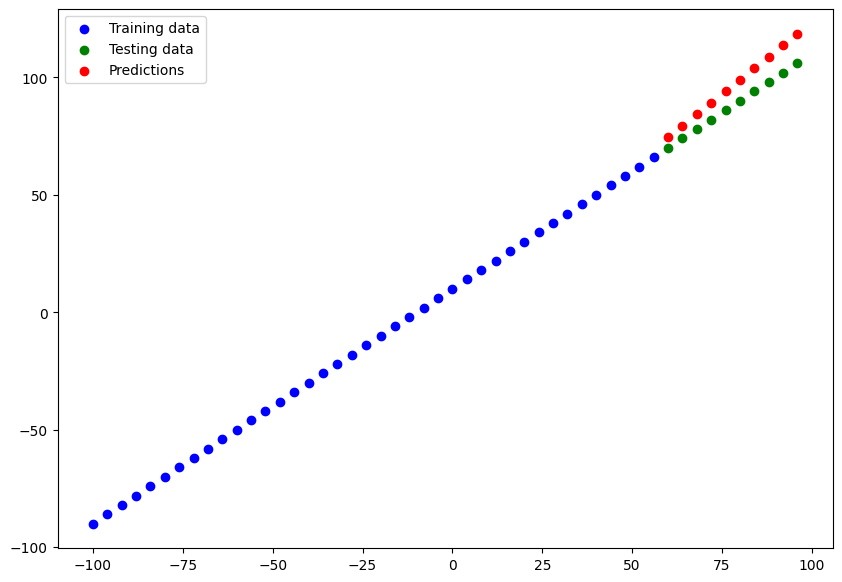

In [14]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [15]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 291ms/step - loss: 8.5727 - mae: 8.5727


[8.57265567779541, 8.57265567779541]

In [16]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.448873, 11.811475, 10.328517, 10.      , 10.851843, 13.00942 ,
       16.321442, 20.787903, 25.673996, 30.560095], dtype=float32)>

The output should be a single result but we are getting 10 results.
This is because y_test and y_preds have different shape.
To solve this issue we need to use "squeeze" function

In [17]:
y_test, y_preds

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[ 74.58521 ],
        [ 79.47131 ],
        [ 84.357414],
        [ 89.24351 ],
        [ 94.12961 ],
        [ 99.0157  ],
        [103.9018  ],
        [108.7879  ],
        [113.673996],
        [118.5601  ]], dtype=float32))

In [18]:
y_test.shape, y_preds.shape

((10,), (10, 1))

Calaculating Mean Absolute error

In [19]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.572656>

Calaculating Mean Squared error

In [20]:
mae = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=79.96806>

In [21]:
def mae (y_test, y_pred):
  return tf.metrics.mean_absolute_error (y_test, y_pred)

def mse (y_test, y_pred):
  return tf.metrics.mean_squared_error (y_test, y_pred)


Now we will build 3 models and study the output

Model 1 : 1 Layer, trained for 100 Epochs

In [22]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 38ms/step - loss: 92.8347 - mae: 92.8347
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 57.3792 - mae: 57.3792
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 20.6648 - mae: 20.6648
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 9.3718 - mae: 9.3718
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 10.2463 - mae: 10.2463
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.5036 - mae: 9.5036
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 8.6354 - mae: 8.6354
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 9.0754 - mae: 9.0754
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 18.8639 - mae: 18.8639
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1958 - mae: 10.1958
Epoch 11/100
2/2 [==============================] - 0s 14

1/1 [==============================] - 0s 80ms/step


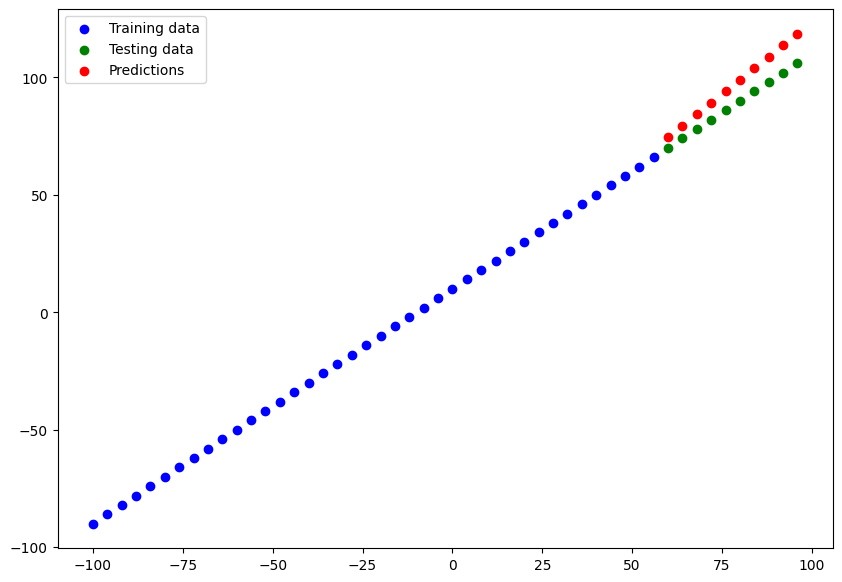

In [23]:
y_preds_1 = model1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [24]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.542308, 79.44607)

In [25]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile (loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model2.fit (tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 108ms/step


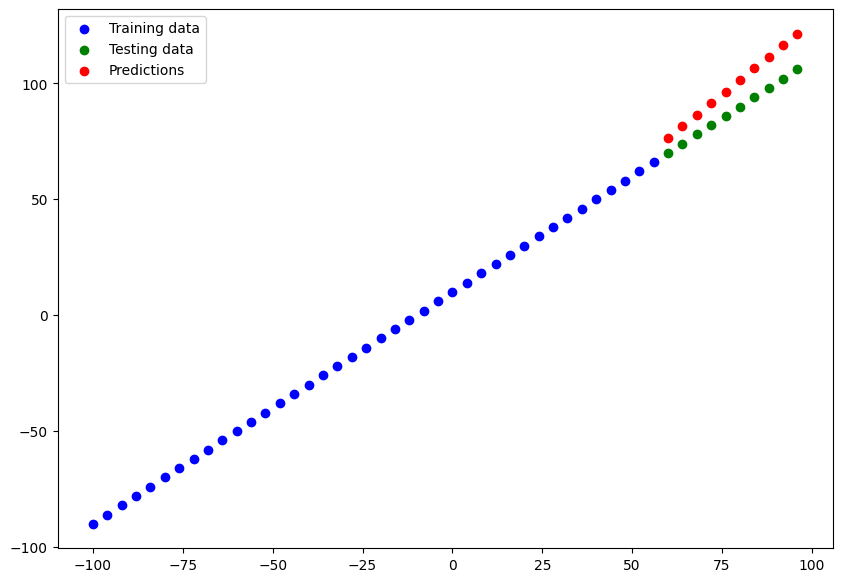

In [26]:
y_preds_2 = model2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [27]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.938494, 127.674095)

In [28]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model3.compile (loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model3.fit (tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 249ms/step


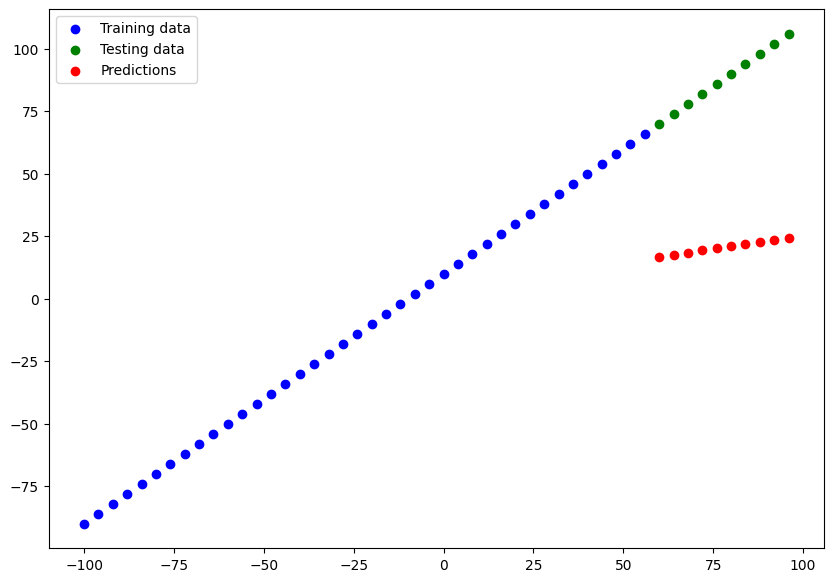

In [29]:
y_preds_3 = model3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [30]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.4275, 4629.472)

In [31]:
model_results = [["model1", mae_1, mse_1],
                 ["model2", mae_2, mse_2],
                 ["model3", mae_3, mse_3]]

In [32]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model1,8.542308,79.446068
1,model2,10.938494,127.674095
2,model3,67.427498,4629.472168


In [35]:
model2.save('best_model_SavedModel_format')

In [36]:
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [37]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
